<a href="https://colab.research.google.com/github/chxyxn/Kaggle-A-B-Testing-Marketing-Campaign/blob/main/Kaggle_A_B_Testing_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy scipy statsmodels seaborn matplotlib


In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ab_test_data.csv")
print(df.head())
print(df.info())


   USER_ID VARIANT_NAME  REVENUE
0      737      variant      0.0
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
4     6174      variant      0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
None


In [6]:
# Count rows per group (control vs variant)
print(df['VARIANT_NAME'].value_counts())

# Average revenue per group
print(df.groupby('VARIANT_NAME')['REVENUE'].mean())


VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64
VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64


In [9]:
from statsmodels.stats.proportion import proportions_ztest

# Convert revenue into binary "converted" column (1 if >0, else 0)
df['converted'] = (df['REVENUE'] > 0).astype(int)

# Count conversions per group
conversions = df.groupby('VARIANT_NAME')['converted'].sum()
samples = df.groupby('VARIANT_NAME')['converted'].count()

# Run Z-test
stat, pval = proportions_ztest(conversions, samples)
print(f"Z-stat: {stat:.3f}, p-value: {pval:.4f}")
print(conversions / samples)

Z-stat: 0.694, p-value: 0.4879
VARIANT_NAME
control    0.016051
variant    0.014354
Name: converted, dtype: float64


In [10]:
from scipy.stats import ttest_ind

control = df[df['VARIANT_NAME'] == 'control']['REVENUE']
variant = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

t_stat, pval = ttest_ind(control, variant)
print(f"T-stat: {t_stat:.3f}, p-value: {pval:.4f}")
print("Mean revenue (control):", control.mean())
print("Mean revenue (variant):", variant.mean())


T-stat: 1.271, p-value: 0.2037
Mean revenue (control): 0.12901284109149277
Mean revenue (variant): 0.07006977671451356


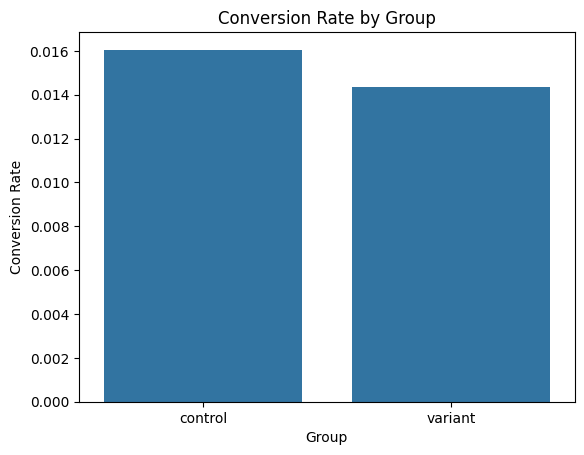

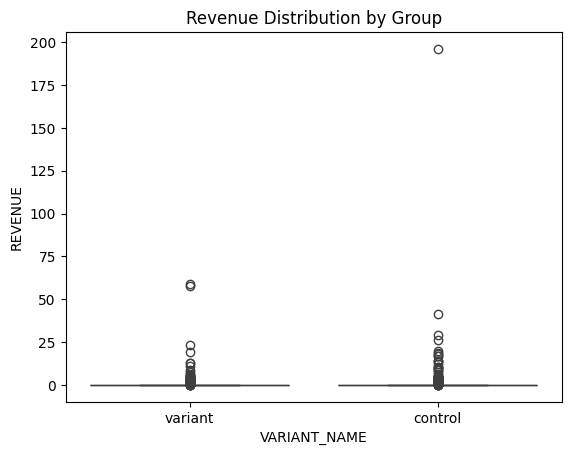

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion rates barplot
conv_rates = (conversions / samples).reset_index()
conv_rates.columns = ["Group", "Conversion Rate"]

sns.barplot(data=conv_rates, x="Group", y="Conversion Rate")
plt.title("Conversion Rate by Group")
plt.show()

# Revenue distribution
sns.boxplot(data=df, x="VARIANT_NAME", y="REVENUE")
plt.title("Revenue Distribution by Group")
plt.show()
